# Kunal Naidu 

## Assignment 4

## UCID: 30020999

## Introduction

In this project we will be exploring Euler's Method and testing different ways to make it more efficient.


For a linear spring the force balance is:

$$ \ddot x + \omega^2 x = 0 \qquad \omega = \sqrt{\frac{k}{m}} $$

has solutions of the form

$$ x = A \sin( \omega t + \phi ) $$

$$ v = \omega A \cos( \omega t + \phi ) $$

$$ a = -\omega^2 A \sin( \omega t + \phi ) $$



## Energy

If all the forces are conservative, then the total energy of the system should be constant

  $$ E = \frac{1}{2} m v^2 + \frac{1}{2} k x^2 $$

In [3]:
import numpy as np

def percent(theoredical,experimental):
    """
    Calculates the percent difference of two numbers
    
    Parameters
    ----------
    
    theoredical= the theoredical value
    
    experimental= the 
    
    Return
    -------
    percent difference of the experimental and theoredical value
    
    """
    result=abs((experimental-theoredical)/theoredical)*100
    return result

def theoredical(dt):
    amplitude = 1.0
    mass = 1.0
    springk = 1.0
    wfreq = np.sqrt( springk / mass )
    phase0 = 0.001   # very crude way to avoid divide by zero (below)
    time=[0.0] 
    for n in range(999):
        time.append(time[-1]+dt)
    time=np.array(time)
    displacement = amplitude * np.sin( wfreq * time + phase0 )
    velocity = wfreq * amplitude * np.cos( wfreq * time + phase0 )
    acceleration = -wfreq**2 * amplitude * np.sin( wfreq * time + phase0)
    result=np.array([displacement, velocity, acceleration, time])
    return result

In [4]:
Data=theoredical(1e-3)
print
displacement=Data[0,:]
velocity=Data[1,:]
acceleration=Data[2,:]
time=Data[3,:]
Energy= ((1/2)*displacement*displacement)+((1/2)*velocity*velocity)
print(np.shape(Energy))
print(np.shape(time))

(1000,)
(1000,)


(0.49, 0.51)

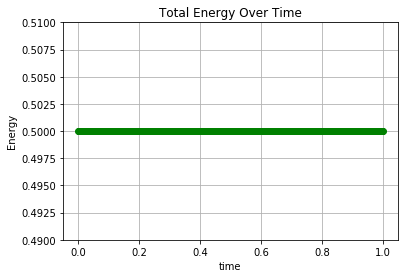

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( time, Energy, 'go-', label = 'x' )

plt.xlabel('time')
plt.title('Total Energy Over Time')
plt.ylabel('Energy')
plt.grid('on')
plt.ylim(0.49,0.51)

In [6]:
# checking to see if slope is zero or that all y-values are the same.
a=0
for i in range (0,len(Energy)-1):
    slope= (Energy[i]-Energy[i+1])/(time[i]-time[i+1])
    if np.around(slope) == 0:
        pass
    else:
        a=a+1

if a != 0:
    print('Energy is not Conserved')
else:
    print("Energy is Conserved")


Energy is Conserved


## Angular Frequency

The angular frequency $\omega$ for a perfect simple harmonic oscillator should depend on the ratio of mass to spring constant.

 $$\omega = \sqrt{k \over m}$$
 
 Taking the ratio of $a$ to $x$ should in theory give us $-\omega^2$

 $${a \over x} = {{-\omega^2 A \sin(\omega t + \phi}\over{A \sin(\omega t + \phi)}} = -\omega^2$$


In practice there is the possibility of dividing by zero, but we will try to avoid that by offsetting the phase by some small value so that none of the times correspond exactly to $x=0$.

In [7]:
% timeit angular=np.sqrt(-(acceleration/displacement))

angular=np.sqrt(-(acceleration/displacement))

5.5 µs ± 241 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
angular_theoredical=np.sqrt(1/1)

In [9]:
b=0
for values in angular:
    if values != angular_theoredical:
        b=b+1
if b == 0:
    print('The angular frequency is ', angular_theoredical)

The angular frequency is  1.0


In [10]:
def euler(dt):
    """
    Uses Euler's Method to calculate acceleration, velocity, displacement, and time.
    
    Parameters
    ----------
    
    dt= time step
    
    Return
    -------
    a numpy array of acceleration, velocity, displacement, and time
    
    """
    # define mass and linear spring constant
    m, k = 1.0, 1.0
    # initial conditions: t=0, v,a=0, x=1
    # use python lists for now
    x,v,a,t = [1.0], [0.0], [0.0], [0.0]
    # time step size
    # take almost a thousand steps, appending results to each list
    for n in range(999):
        t.append(t[-1]+dt)    # step in time
        a.append(-k/m*x[-1])  # calculate acceleration
        v.append(v[-1] + a[-1]*dt) # calculate velocity
        x.append(x[-1] + v[-1]*dt) # calculate displacement
    # numpy arrays are usually easier to work with than lists
    x = np.array(x)
    v = np.array(v)
    a = np.array(a)
    t = np.array(t)
    result= np.array([x,v,a,t])
    return result

In [11]:
euler_1= euler(1e-3)

x=euler_1[0,:]
v=euler_1[1,:]
a=euler_1[2,:]
t=euler_1[3,:]

energy= 1/2*1*x*x+1/2*1*v*v

Text(0,0.5,'Energy')

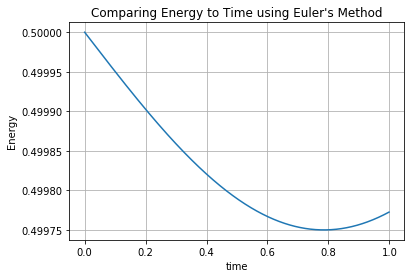

In [12]:
import matplotlib.pyplot as plt


plt.plot(t,energy)

plt.grid('on')
plt.title("Comparing Energy to Time using Euler's Method")
plt.xlabel('time')
plt.ylabel('Energy')


In [13]:
print("The amplitude of the curve is", (np.amax(energy)-np.amin(energy))/2)

print("The percent difference compared to the theoredical value is ", percent(0.5,(np.amax(energy)+np.amin(energy))/2))

The amplitude of the curve is 0.0001249375257488805
The percent difference compared to the theoredical value is  0.0249875051497761


In [14]:
%timeit frequency= -a/x

frequency= -a/x

3.25 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
average= sum(frequency)/float(len(frequency))
print("The average frequency is" ,average)

print("The percent difference compared to the theoredical value is ", percent(1.0,average),"%" )

The average frequency is 0.9996151263316106
The percent difference compared to the theoredical value is  0.038487366838935166 %


In [16]:
error= abs(average-angular_theoredical)/abs(angular_theoredical)*100
print("The percent difference between the theoredical value for angular frequency and the average value using Euler's method is ", error ,'%')

The percent difference between the theoredical value for angular frequency and the average value using Euler's method is  0.038487366838935166 %


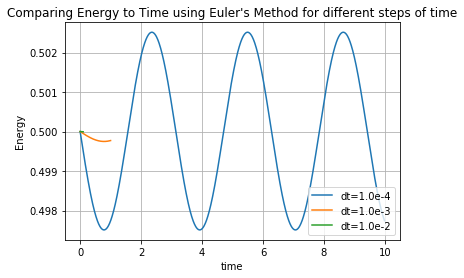

In [17]:
time_step=np.array([1.0e-2,1.0e-3,1.0e-4])
for dt,l in zip(time_step,['dt=1.0e-4','dt=1.0e-3','dt=1.0e-2']):
    euler_1= euler(dt)
    x=euler_1[0,:]
    v=euler_1[1,:]
    a=euler_1[2,:]
    t=euler_1[3,:]
    Energy_1= 1/2*x*x+1/2*v*v
    plt.plot(t,Energy_1,label=l)
    
plt.title("Comparing Energy to Time using Euler's Method for different steps of time")
plt.xlabel('time')
plt.ylabel('Energy')
plt.legend(loc=0)
plt.grid('on')


In [18]:
print("The amplitude of the curve is", (np.amax(Energy)-np.amin(energy))/2)

The amplitude of the curve is 0.00012493752574893602


In [116]:
euler_1= euler(1.0e-2)

x=euler_1[0,:]
v=euler_1[1,:]
a=euler_1[2,:]
t=euler_1[3,:]

x_0=x[0]
result_x=[]
result_x.append(x[0])
for n in range (999):
    v_0=v[0+n]
    t_0=t[0+n]
    t_1=t[1+n]
    x_1= x_0 +v_0*(t_1-t_0)
    result_x.append(x_1)
    x_0=x_1
result=np.array(result_x)
Energy_2=1/2*result*result+1/2*v*v


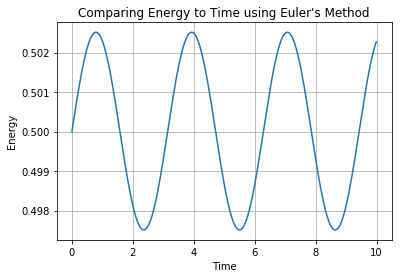

In [117]:
plt.plot(t,euler_old(1e-2))
plt.title("Comparing Energy to Time using Euler's Method")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.grid('on')


In [112]:
print("The amplitude of the curve is", (np.amax(Energy_2)-np.amin(Energy_2))/2)

print("The percent error of the curve is ",percent((np.amax(energy)-np.amin(energy))/2 ,(np.amax(Energy_2)-np.amin(Energy_2))/2))

The amplitude of the curve is 1.1102230246251565e-16
The percent error of the curve is  99.99999999991114


In [24]:

result_x_2=[]
result_x_2.append(x[0])
x_0=x[0]
for n in range (999):
    v_0=v[0+n]
    t_0=t[0+n]
    t_1=t[1+n]
    v_1=v[1+n]
    x_1 = x_0 +1/2*(v_0+v_1)*(t_1-t_0)
    result_x_2.append(x_1)
    x_0=x_1
    
x=np.array(result_x_2) 
Energy_3= 1/2*x*x+1/2*v*v

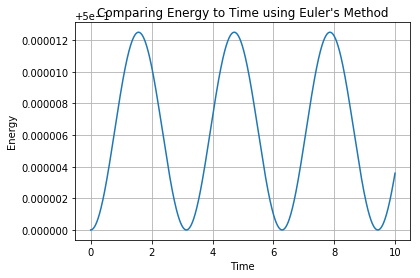

In [25]:
plt.plot(t,Energy_3)
plt.title("Comparing Energy to Time using Euler's Method")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.grid('on')

In [26]:
print("The amplitude of the curve is", (np.amax(Energy_3)-np.amin(Energy_3))/2)

print("The percent difference of the amplitude compared to euler(1e-2) from above was", percent((np.amax(energy)-np.amin(energy))/2,(np.amax(Energy_3)-np.amin(Energy_3))/2 ), '%')

The amplitude of the curve is 6.250152355391503e-06
The percent difference of the amplitude compared to euler(1e-2) from above was 94.99737783509971 %


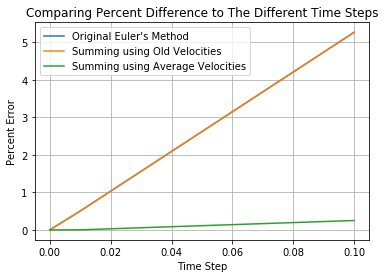

In [124]:
t= np.geomspace(1.0e-20,1.0e-1,20)

Data_1=[]
Data_2=[]
Data_3=[]
for dt in t:
    #using original euler's method
    euler_1=euler(dt)
    x=euler_1[0,:]
    v=euler_1[1,:]
    a=euler_1[2,:]
    t=euler_1[3,:]
        
    Energy_1=1/2*x*x+1/2*v*v
    
    #Theoredical Curve
    euler_2=theoredical(dt)
    displacement=euler_2[0,:]
    velocity=euler_2[1,:]
    acceleration=euler_2[2,:]
    time=euler_2[3,:]
    Energy_2= ((1/2)*displacement*displacement)+((1/2)*velocity*velocity)
        
    error=percent(Energy_2,Energy_1)
        
    error=np.amax(error)
    Data_1.append(error)
    
    
    #using old velocities
    x_0=x[0]
    result_x=[]
    result_x.append(x[0])
    for n in range (999):
        v_0=v[0+n]
        t_0=t[0+n]
        t_1=t[1+n]
        x_1= x_0 +v_0*(t_1-t_0)
        result_x.append(x_1)
        x_0=x_1
    x=np.array(result_x)
    Energy_3= 1/2*x*x+1/2*v*v
    
    error=percent(Energy_2,Energy_3)
    
    error= np.amax(error)
    Data_2.append(error)
    
    
    # average of old and new velocities
    result_x_2=[]
    result_x_2.append(x[0])
    x_0=x[0]
    for n in range (999):
        v_0=v[0+n]
        t_0=t[0+n]
        t_1=t[1+n]
        v_1=v[1+n]
        x_1 = x_0 +1/2*(v_0+v_1)*(t_1-t_0)
        result_x_2.append(x_1)
        x_0=x_1
    
    x=np.array(result_x_2) 
    Energy_4= 1/2*x*x+1/2*v*v
    
    error= percent(Energy_2,Energy_4)
    error= np.amax(error)
    Data_3.append(error)
    
t= np.geomspace(1.0e-20,1.0e-1,20)    
plt.plot(t,Data_1, label="Original Euler's Method")
plt.plot(t,Data_2, label= "Stepping using Old Velocities")
plt.plot(t,Data_3, label= "Stepping using Average Velocities")
plt.grid('on')
plt.legend(loc=0)
plt.title("Comparing Percent Difference to The Different Time Steps")
plt.xlabel('Time Step')
plt.ylabel('Percent Error')
plt.grid('on')




    


Regarding the figure above, Original Euler's Method and Summing using Old Velocities overlap.

## Discussion

Euler's method does not conserve energy because as we plot energy to time; we see that theres a fluctuation of energy.
Although there is a fluctuation, when taking half of the peak to peak value which was 0.500012 , and comparing it to our theoredical value of the total energy of 0.5 which is slightly smaller. The percent difference when comparing to the theoredical was calculated to be 0.0025%. Due to the small difference between the values we can say that Euler's method can fairly confidently calculate a value for energy. The deviation of the values can be due to rounding error.

When trying to find the angular frequency from Euler's method, an average of the angular frequencies were made which resulted in an angular frequency of 0.986 which is smaller than the theoredical angular frequency of which we calcualted of 1.0. The percent difference between the values is calculated to be 1.373%. We can also be fairly confident with the value that we are able to somewhat accurately calculate the angular frequency using Euler's method. The deviation within the value can be connected to the fact that the energy flucuated and how similarily would result in fluctuations in the angular frequency. This is relevant because the all the angular frequencies calculated for a certain time was averaged.

When adjusting the time steps, the amplitude of all the different time steps were approximately the peak error was not effected. When comparing the different curves, the only difference between them were the frequency of the wave and how far the wave went across the time axis. 

When we step using the previous velocities, there was a amplitude of 0.00250006 with a percent difference when compared to euler(1e-2) of 0.0018%. Due to such a small percent difference we an say that there is relatively no change when stepping up using old velocities. This is also shown in the last figure when comparing the differnt time steps to percent error for the different methods of stepping x. We can see that using the Original Euler's method and Summing using old velocities are on the same line.

When we step using the average of old and new velocities, the amplitude was 6.25e-06. Compared to euler(1e-2), there was a 99.7499% difference between the values. Using the average of old and new velocities has a significantly smaller peak error.

## Conclusion

After exploring Euler's method we determined that Euler's method does not conserve energy, but can give a reasonable value for angular frequency. Also when comparing the step using previous velocities, step using average of previous and new velocites, and the original Euler's method, we found that stepping using previous velocities does not decrease error but stepping using average of previous and new velocities significantly decreases error.